<a href="https://colab.research.google.com/github/cahayairham/Pemrograman-Python/blob/main/fix_grafik_pathloss_cahaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#fungsi pathloss
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [3]:
#konstanta
tower=80  
user=1.5 
dmin=200 
dmax=700 
N=200 
d=np.random.randint(dmin,dmax,N)

In [4]:
#fungsi 3 keadaan frekuensi sama, lokasi berbeda
def fsama1():
  f=1800 
  loc='urban'
  LpUrban=cos(f,loc,tower,user,d)
  d_sort=d[np.argsort(d)]
  Urban_sort=LpUrban[np.argsort(d)]
  return d_sort,Urban_sort

def fsama2():
  f=1800 
  loc='open'
  LpUrban=cos(f,loc,tower,user,d)
  d_sort=d[np.argsort(d)]
  Urban_sort=LpUrban[np.argsort(d)]
  return d_sort,Urban_sort

def fsama3():
  f=1800 
  loc='suburban'
  LpUrban=cos(f,loc,tower,user,d)
  d_sort=d[np.argsort(d)]
  Urban_sort=LpUrban[np.argsort(d)]
  return d_sort,Urban_sort

d11,pl11 = fsama1()
d12,pl12 = fsama2()
d13,pl13 = fsama3()

In [5]:
#fungsi 3 keadaan lokasi sama, frekuensi berbeda
def lsama1():
  f=700 
  loc='urban'
  LpUrban=cos(f,loc,tower,user,d)
  d_sort=d[np.argsort(d)]
  Urban_sort=LpUrban[np.argsort(d)]
  return d_sort,Urban_sort

def lsama2():
  f=900 
  loc='urban'
  LpUrban=cos(f,loc,tower,user,d)
  d_sort=d[np.argsort(d)]
  Urban_sort=LpUrban[np.argsort(d)]
  return d_sort,Urban_sort

def lsama3():
  f=1800 
  loc='urban'
  LpUrban=cos(f,loc,tower,user,d)
  d_sort=d[np.argsort(d)]
  Urban_sort=LpUrban[np.argsort(d)]
  return d_sort,Urban_sort

d21,pl21 = lsama1()
d22,pl22 = lsama2()
d23,pl23 = lsama3()

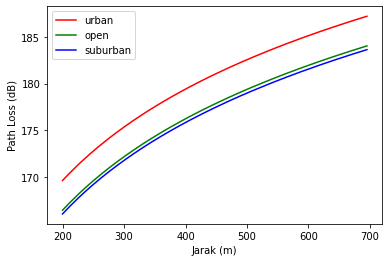

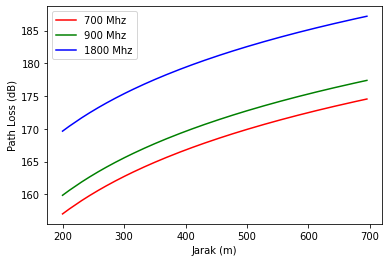

In [6]:
#grafik

plt.figure()
plt.plot(d11,pl11,'r', label='urban')
plt.plot(d12,pl12,'g', label='open')
plt.plot(d13,pl13,'b', label='suburban')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

plt.figure()
plt.plot(d21,pl21,'r', label='700 Mhz')
plt.plot(d22,pl22,'g', label='900 Mhz')
plt.plot(d23,pl23,'b', label='1800 Mhz')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()